### Project 2 - Customer Segmentation using RFM Analysis

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [84]:
df= pd.read_csv('data.csv',encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### 1. Data Processing:

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [87]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [88]:
df.dropna(inplace=True)
dfd = df
dfd

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [89]:
dfd.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [128]:
dfd['InvoiceDate'] = pd.to_datetime(dfd['InvoiceDate'])
dfd['CustomerID'] = dfd['CustomerID'].apply(np.int64)
dfd.info()

C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3639786954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['InvoiceDate'] = pd.to_datetime(dfd['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         401604 non-null  object        
 1   StockCode         401604 non-null  object        
 2   Description       401604 non-null  object        
 3   Quantity          401604 non-null  int64         
 4   InvoiceDate       401604 non-null  datetime64[ns]
 5   UnitPrice         401604 non-null  float64       
 6   CustomerID        401604 non-null  int64         
 7   Country           401604 non-null  object        
 8   Total_Spend       401604 non-null  float64       
 9   OrderDay          401604 non-null  object        
 10  OrderTime         401604 non-null  object        
 11  OrderHour         401604 non-null  int32         
 12  DayOfWeek         401604 non-null  int32         
 13  OrderProcessTime  397232 non-null  float64       
 14  YearMonth

C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3639786954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['CustomerID'] = dfd['CustomerID'].apply(np.int64)


In [91]:
dfd = dfd.drop_duplicates()
dfd

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


### 1. Data Overview
#### - What is the size of the dataset in terms of the number of rows and columns?
#### - Can you provide a brief description of each column in the dataset?
#### - What is the time period covered by this dataset?

In [92]:
# Size of the dataset 
num_rows, num_columns = dfd.shape
print(f"Size of the dataset: {num_rows} rows and {num_columns} columns")
print("\n")

# Description of each column
column_descriptions = dfd.describe(include='all')
print("Column Descriptions:")
print(column_descriptions)
print("\n")

# Time period covered by the dataset
start_date = dfd['InvoiceDate'].min()
end_date = dfd['InvoiceDate'].max()
print(f"Time period covered by the dataset: From {start_date} to {end_date}")

Size of the dataset: 401604 rows and 8 columns


Column Descriptions:
       InvoiceNo StockCode                         Description       Quantity  \
count     401604    401604                              401604  401604.000000   
unique     22190      3684                                3896            NaN   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         542      2065                                2058            NaN   
mean         NaN       NaN                                 NaN      12.183273   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       2.000000   
50%          NaN       NaN                                 NaN       5.000000   
75%          NaN       NaN                                 NaN      12.000000   
max          NaN       NaN                                 NaN   80995.000000   
std          NaN       NaN             

### 2. Customer Analysis
#### - How many unique customers are there in the dataset?
#### - What is the distribution of the number of orders per customer?
#### - Can you identify the top 5 customers who have made the most purchases by order count?

Number of unique customers: 4372
Distribution of orders per customer:
CustomerID
17841    7812
14911    5898
14096    5128
12748    4459
14606    2759
         ... 
18068       1
13256       1
15590       1
16138       1
15389       1
Name: count, Length: 4372, dtype: int64


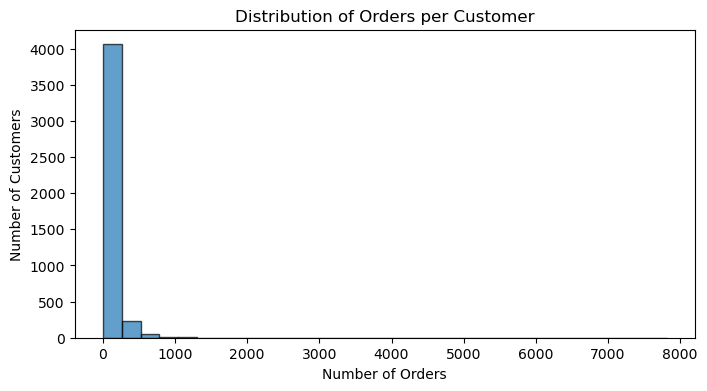

Top 5 customers with the most purchases by order count:
CustomerID
17841    7812
14911    5898
14096    5128
12748    4459
14606    2759
Name: count, dtype: int64


In [93]:
# Unique Customers
unique_customers = dfd['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

# Distribution of the number of orders per customer
orders_per_customer = dfd['CustomerID'].value_counts()
print("Distribution of orders per customer:")
print(orders_per_customer)

plt.figure(figsize=(8, 4))
plt.hist(orders_per_customer, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Top 5 customers with the most purchases by order count
top_5_customers = orders_per_customer.head(5)
print("Top 5 customers with the most purchases by order count:")
print(top_5_customers)

### 3. Product Analysis
#### - What are the top 10 most frequently purchased products?
#### - What is the average price of products in the dataset?
#### - Can you find out which product category generates the highest revenue?

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: count, dtype: int64




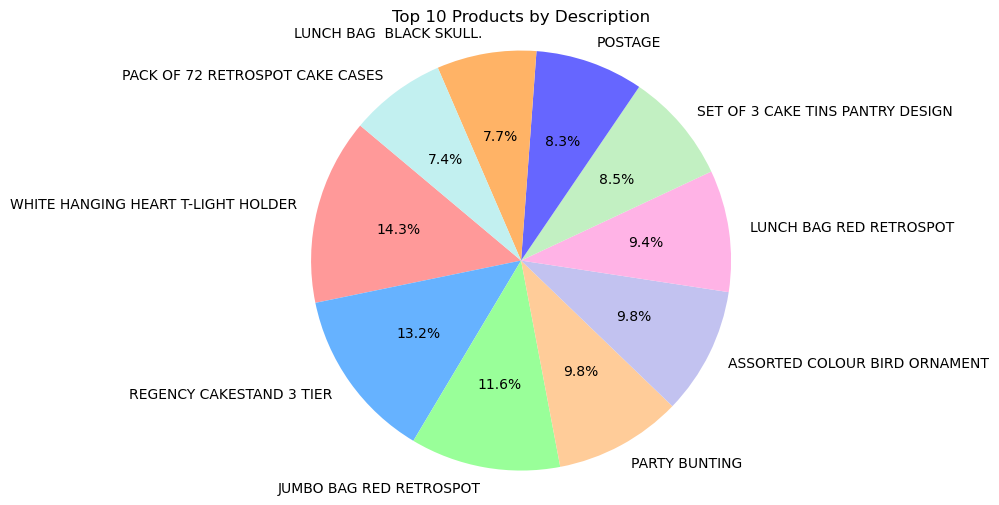

Average Price of Products: Description
 4 PURPLE FLOCK DINNER CANDLES       2.312162
 50'S CHRISTMAS GIFT BAG LARGE       1.248091
 DOLLY GIRL BEAKER                   1.243796
 I LOVE LONDON MINI BACKPACK         4.138406
 I LOVE LONDON MINI RUCKSACK         4.150000
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      0.836888
ZINC TOP  2 DOOR WOODEN SHELF       16.768182
ZINC WILLIE WINKIE  CANDLE STICK     0.872344
ZINC WIRE KITCHEN ORGANISER          7.175000
ZINC WIRE SWEETHEART LETTER TRAY     3.454000
Name: UnitPrice, Length: 3896, dtype: float64


StockCode with the Highest Revenue: REGENCY CAKESTAND 3 TIER
Total Revenue: 132567.69999999998




C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3938454433.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['Total_Spend']=dfd['UnitPrice']*dfd['Quantity']


In [94]:
# top 10 most frequently purchased products
product_counts = dfd['Description'].value_counts()
top_10_products = product_counts.head(10)
print(top_10_products)
print("\n")

plt.figure(figsize=(8, 6))
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#6666ff', '#ffb366', '#c2f0f0']
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.axis('equal')  
plt.title('Top 10 Products by Description')
plt.show()

# average price of products
average_price = dfd.groupby('Description')['UnitPrice'].mean()
print("Average Price of Products:", average_price)
print("\n")

# the total revenue for each category
dfd['Total_Spend']=dfd['UnitPrice']*dfd['Quantity']
product_revenue = dfd.groupby('Description')['Total_Spend'].sum()
highest_revenue_stock = product_revenue.idxmax()
highest_revenue = product_revenue.max()
print("StockCode with the Highest Revenue:", highest_revenue_stock)
print("Total Revenue:", highest_revenue)
print("\n")

### 4. Time Analysis
#### - Is there a specific day of the week or time of day when most orders are placed?
#### - What is the average order processing time?
#### - Are there any seasonal trends in the dataset?

C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3328187828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['InvoiceDate'] = pd.to_datetime(dfd['InvoiceDate'])
C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3328187828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['OrderDay'] = dfd['InvoiceDate'].dt.date
C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3328187828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

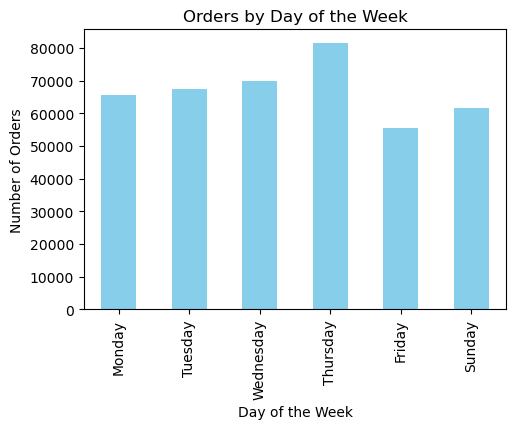

C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3328187828.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['OrderProcessTime'] = (dfd['InvoiceDate'] - dfd.groupby('CustomerID')['InvoiceDate'].shift(1)).dt.total_seconds() / 3600
C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3328187828.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['YearMonth'] = dfd['InvoiceDate'].dt.to_period('M')


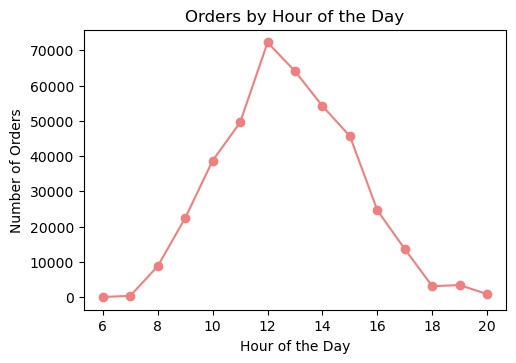

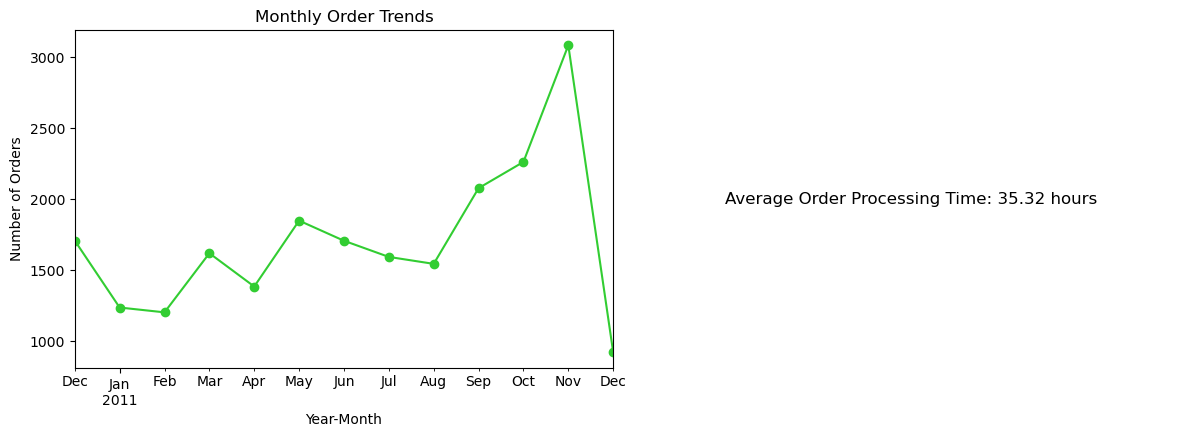

In [95]:
dfd['InvoiceDate'] = pd.to_datetime(dfd['InvoiceDate'])
dfd['OrderDay'] = dfd['InvoiceDate'].dt.date
dfd['OrderTime'] = dfd['InvoiceDate'].dt.time
dfd['OrderHour'] = dfd['InvoiceDate'].dt.hour
dfd['DayOfWeek'] = dfd['InvoiceDate'].dt.dayofweek  

orders_by_day_of_week = dfd['DayOfWeek'].value_counts().sort_index()
orders_by_hour = dfd['OrderHour'].value_counts().sort_index()

plt.figure(figsize=(12, 8))

#day of the week with the most orders
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

orders_by_day_of_week.index = orders_by_day_of_week.index.map(day_mapping)
plt.subplot(221)
orders_by_day_of_week.plot(kind='bar', color='skyblue')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

# hour of the day with the most orders
plt.figure(figsize=(12, 8))
plt.subplot(222)
orders_by_hour.plot(kind='line', marker='o', color='lightcoral')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

# Average order processing time
dfd['OrderProcessTime'] = (dfd['InvoiceDate'] - dfd.groupby('CustomerID')['InvoiceDate'].shift(1)).dt.total_seconds() / 3600
average_process_time = dfd['OrderProcessTime'].mean()

# Display the average order processing time
plt.figure(figsize=(12, 8))
plt.subplot(224)
plt.text(0.5, 0.5, f'Average Order Processing Time: {average_process_time:.2f} hours',
         fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.axis('off')

#seasonal trends (monthly) in the dataset
dfd['YearMonth'] = dfd['InvoiceDate'].dt.to_period('M')
monthly_order_count = dfd.groupby('YearMonth')['InvoiceNo'].nunique()

# Plot seasonal trends (monthly)
plt.subplot(223)
monthly_order_count.plot(kind='line', marker='o', color='limegreen')
plt.title('Monthly Order Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')

plt.tight_layout()

### 5.Geographical Analysis
#### - Can you determine the top 5 countries with the highest number of orders?
#### - Is there a correlation between the country of the customer and the average order value?

Top 5 countries with highest number of orders
Country
United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 5 Countries by Orders')

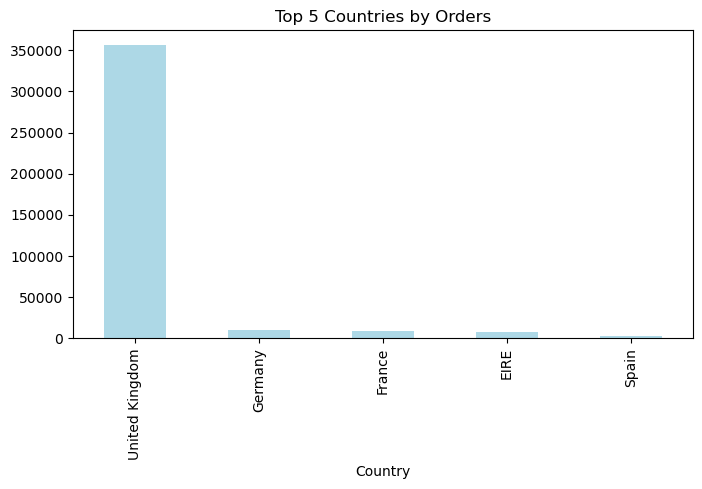

In [96]:
orders_by_country = dfd['Country'].value_counts()
avgc = dfd.groupby('Country')['Total_Spend'].mean()
print("Top 5 countries with highest number of orders")
top_5_countries = orders_by_country.head(5)
print(top_5_countries)

plt.figure(figsize=(8, 4))
top_5_countries.plot(kind='bar', color='lightblue')
plt.title('Top 5 Countries by Orders')

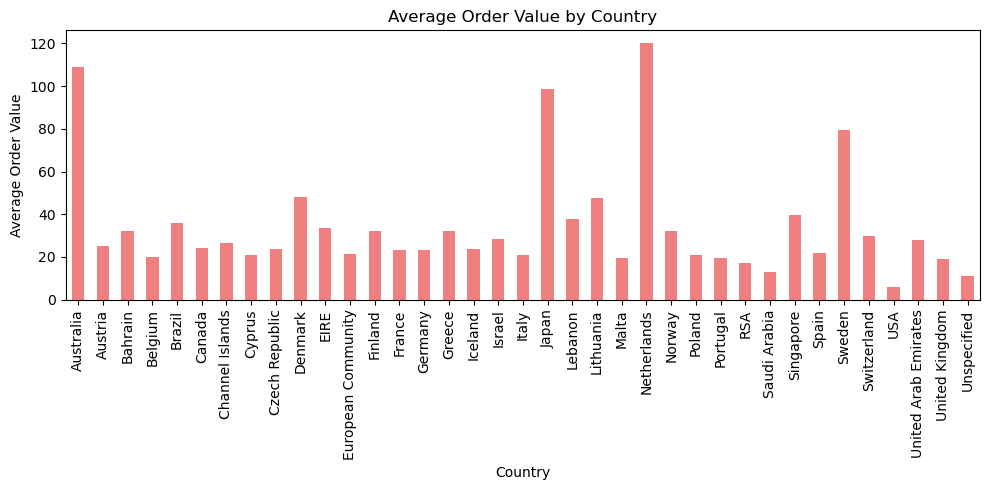

Correlation between Country and Average Order Value:
Country
Australia               108.910787
Austria                  25.322494
Bahrain                  32.258824
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.520991
Cyprus                   21.045434
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     33.445054
European Community       21.176230
Finland                  32.124806
France                   23.200714
Germany                  23.365978
Greece                   32.263836
Iceland                  23.681319
Israel                   28.293117
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.059696
Norway                   32.378877
Poland                   21.152903
Portugal                 19.7

In [97]:
correlation = dfd.groupby('Country').apply(lambda group: group['Total_Spend'].corr(group.count()))
plt.figure(figsize=(10, 5))
avgc.plot(kind='bar', color='lightcoral')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')

plt.tight_layout()
plt.show()

print(f'Correlation between Country and Average Order Value:\n{avgc}')

### 6. Payment Analysis
#### - What are the most common payment methods used by customers?
#### - Is there a relationship between the payment method and the order amount?

In [98]:
payment_methods = ['Credit Card', 'Debit Card', 'Zelle', 'Apple Pay']
random_payment_methods = [random.choice(payment_methods) for _ in range(len(dfd))]
dfd['Payment Method'] = random_payment_methods

dfd.head()

C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3904385634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['Payment Method'] = random_payment_methods


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Spend,OrderDay,OrderTime,OrderHour,DayOfWeek,OrderProcessTime,YearMonth,Payment Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,08:26:00,8,2,NaN,2010-12,Credit Card
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Zelle
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,08:26:00,8,2,0.0,2010-12,Debit Card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Debit Card
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Debit Card


In [99]:
payment_counts = dfd.groupby('Payment Method')['CustomerID'].count()
max_payment_method = payment_counts.idxmax()

print("Payment Method with the maximum count:", max_payment_method)

Payment Method with the maximum count: Zelle


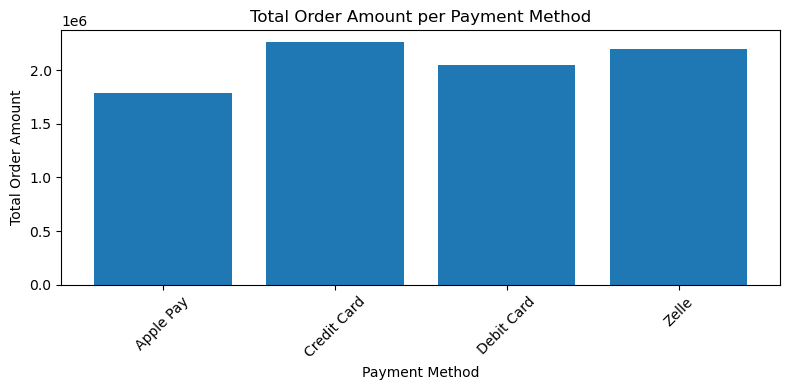

In [100]:
total_order_amount_per_payment = dfd.groupby('Payment Method')['Total_Spend'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.bar(total_order_amount_per_payment['Payment Method'], total_order_amount_per_payment['Total_Spend'])
plt.xlabel('Payment Method')
plt.ylabel('Total Order Amount')
plt.title('Total Order Amount per Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7. Customer Behavior
#### - How long, on average, do customers remain active (between their first and last purchase)?
#### - Are there any customer segments based on their purchase behavior?

In [101]:
dfd['InvoiceDate'] = pd.to_datetime(dfd['InvoiceDate'])
customer_activity = dfd.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])

#average duration of customer activity
customer_activity['ActivityDuration'] = (customer_activity['max'] - customer_activity['min']).dt.days.mean()

print(f'Average Duration of Customer Activity: {customer_activity["ActivityDuration"].mean()} days')

#recency and frequency 
recency = (customer_activity['max'].max() - customer_activity['max']).dt.days
frequency = dfd['CustomerID'].value_counts()
customer_segments = pd.DataFrame({'Recency': recency, 'Frequency': frequency})

# segment thresholds 
recency_threshold = customer_segments['Recency'].median()
frequency_threshold = customer_segments['Frequency'].median()
print("recency_threshold: ",recency_threshold)
print("frequency_threshold: ",frequency_threshold)

# Assign segments 
customer_segments['Segment'] = 'Low Activity'
customer_segments.loc[(customer_segments['Recency'] <= recency_threshold) & (customer_segments['Frequency'] > frequency_threshold), 'Segment'] = 'High Activity'

print('\nCustomer Segments:')
print(customer_segments)

Average Duration of Customer Activity: 133.38586459286367 days
recency_threshold:  49.0
frequency_threshold:  41.0

Customer Segments:
            Recency  Frequency        Segment
CustomerID                                   
12346           325          2   Low Activity
12347             1        182  High Activity
12348            74         31   Low Activity
12349            18         73  High Activity
12350           309         17   Low Activity
...             ...        ...            ...
18280           277         10   Low Activity
18281           180          7   Low Activity
18282             7         13   Low Activity
18283             3        721  High Activity
18287            42         70  High Activity

[4372 rows x 3 columns]


C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\3228240013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['InvoiceDate'] = pd.to_datetime(dfd['InvoiceDate'])


### 8. Returns and Refunds
#### - What is the percentage of orders that have experienced returns or refunds?
#### - Is there a correlation between the product category and the likelihood of returns?

In [102]:
returns = dfd[dfd['Quantity'] < 0]

# percentage of returns or refunds
total_orders = len(dfd)
orders_returned = len(returns)
percentage = (orders_returned / total_orders) * 100

print(f'Percentage of Orders with Returns or Refunds: {percentage:.2f}%')

# Group the returns by product category
return_category = returns.groupby('Description')['InvoiceNo'].count()
total_order_category = dfd.groupby('Description')['InvoiceNo'].count()

# percentage of returns for each category
percentage_return_category = (return_category / total_order_category) * 100

print('Percentage of Returns by Product Category:')
percentage_return_category

Percentage of Orders with Returns or Refunds: 2.21%
Percentage of Returns by Product Category:


Description
 4 PURPLE FLOCK DINNER CANDLES            NaN
 50'S CHRISTMAS GIFT BAG LARGE       0.909091
 DOLLY GIRL BEAKER                   1.459854
 I LOVE LONDON MINI BACKPACK              NaN
 I LOVE LONDON MINI RUCKSACK              NaN
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      1.244813
ZINC TOP  2 DOOR WOODEN SHELF       18.181818
ZINC WILLIE WINKIE  CANDLE STICK     0.520833
ZINC WIRE KITCHEN ORGANISER               NaN
ZINC WIRE SWEETHEART LETTER TRAY          NaN
Name: InvoiceNo, Length: 3896, dtype: float64

In [103]:
not_returned_orders=dfd[dfd['Quantity'] > 0]
not_returned_orders.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Spend,OrderDay,OrderTime,OrderHour,DayOfWeek,OrderProcessTime,YearMonth,Payment Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,08:26:00,8,2,NaN,2010-12,Credit Card
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Zelle
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,08:26:00,8,2,0.0,2010-12,Debit Card


In [104]:
not_returned_orders = not_returned_orders.groupby('Description')['Quantity'].sum()
not_returned_orders = not_returned_orders.to_frame().reset_index()
not_returned_orders.head()

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,138
1,50'S CHRISTMAS GIFT BAG LARGE,1885
2,DOLLY GIRL BEAKER,2394
3,I LOVE LONDON MINI BACKPACK,359
4,I LOVE LONDON MINI RUCKSACK,1


In [105]:
returned_orders= returns.groupby('Description')['Quantity'].sum()
returned_orders= returned_orders.to_frame().reset_index()
returned_orders

,Description,Quantity
0,50'S CHRISTMAS GIFT BAG LARGE,-2
1,DOLLY GIRL BEAKER,-7
2,OVAL WALL MIRROR DIAMANTE,-5
3,SET 2 TEA TOWELS I LOVE LONDON,-8
4,SPACEBOY BABY GIFT SET,-6
...,...,...
1940,ZINC SWEETHEART WIRE LETTER RACK,-4
1941,ZINC T-LIGHT HOLDER STAR LARGE,-11
1942,ZINC T-LIGHT HOLDER STARS SMALL,-44
1943,ZINC TOP 2 DOOR WOODEN SHELF,-5


In [106]:
merged_data = not_returned_orders.merge(returned_orders, on='Description', how='left', suffixes=('_ordered', '_returned'))

# Calculate the correlation between product category and return percentage
correlation = merged_data[['Quantity_ordered', 'Quantity_returned']].corr().iloc[0::2,-1]

print("Correlation between Product Category and Likelihood of Returns:")
print(correlation)

Correlation between Product Category and Likelihood of Returns:
Quantity_ordered   -0.581692
Name: Quantity_returned, dtype: float64


### 9. Profitability Analysis
#### - Can you calculate the total profit generated by the company during the dataset's time period?
#### - What are the top 5 products with the highest profit margins?

In [107]:
#randomly generating Unit Price for calculating cost price
random.seed(42) 
valid_quantity_df = dfd[dfd['Quantity'] >= 0]
valid_quantity_df['CostUnitPrice'] = valid_quantity_df['UnitPrice'] * (1 - (random.uniform(0, 0.1)))
valid_quantity_df['CostUnitPrice']=valid_quantity_df['CostUnitPrice'].round(2)
valid_quantity_df['CostPrice']=valid_quantity_df['CostUnitPrice']*valid_quantity_df['Quantity']
valid_quantity_df['Profit']=valid_quantity_df['Total_Spend']-valid_quantity_df['CostPrice']
Total_profit_generated=valid_quantity_df['Profit'].sum()

print("Total profit generated: ")
print(Total_profit_generated)

print("Top 5 products with higher profits: ")
sorted_df = valid_quantity_df.sort_values(by=['Profit'], ascending=[False])
sorted_df.head(5)

Total profit generated: 
568057.0240000001
Top 5 products with higher profits: 


C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\2294278685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_quantity_df['CostUnitPrice'] = valid_quantity_df['UnitPrice'] * (1 - (random.uniform(0, 0.1)))
C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\2294278685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_quantity_df['CostUnitPrice']=valid_quantity_df['CostUnitPrice'].round(2)
C:\Users\deepa\AppData\Local\Temp\ipykernel_12264\2294278685.py:6: SettingWithCopyWarning: 
A value is try

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Spend,OrderDay,OrderTime,OrderHour,DayOfWeek,OrderProcessTime,YearMonth,Payment Method,CostUnitPrice,CostPrice,Profit
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,2011-12-09,09:15:00,9,4,4919.383333,2011-12,Credit Card,1.95,157940.25,10529.35
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,2011-01-18,10:01:00,10,1,NaN,2011-01,Zelle,0.97,71988.55,5195.05
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00,2011-06-10,15:28:00,15,4,0.100000,2011-06,Apple Pay,607.97,36478.20,2491.80
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,2011-05-03,13:46:00,13,1,0.916667,2011-05,Credit Card,7622.08,7622.08,520.67
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,2011-09-20,11:05:00,11,1,0.000000,2011-09,Debit Card,4.74,6692.88,451.84


### 10. Customer Satisfaction
#### - Is there any data available on customer feedback or ratings for products or services?
#### - Can you analyze the sentiment or feedback trends, if available

Most frequently bought products:
                          Description  count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390
5             LUNCH BAG RED RETROSPOT   1303
6   SET OF 3 CAKE TINS PANTRY DESIGN    1152
7                             POSTAGE   1099
8             LUNCH BAG  BLACK SKULL.   1078
9     PACK OF 72 RETROSPOT CAKE CASES   1050


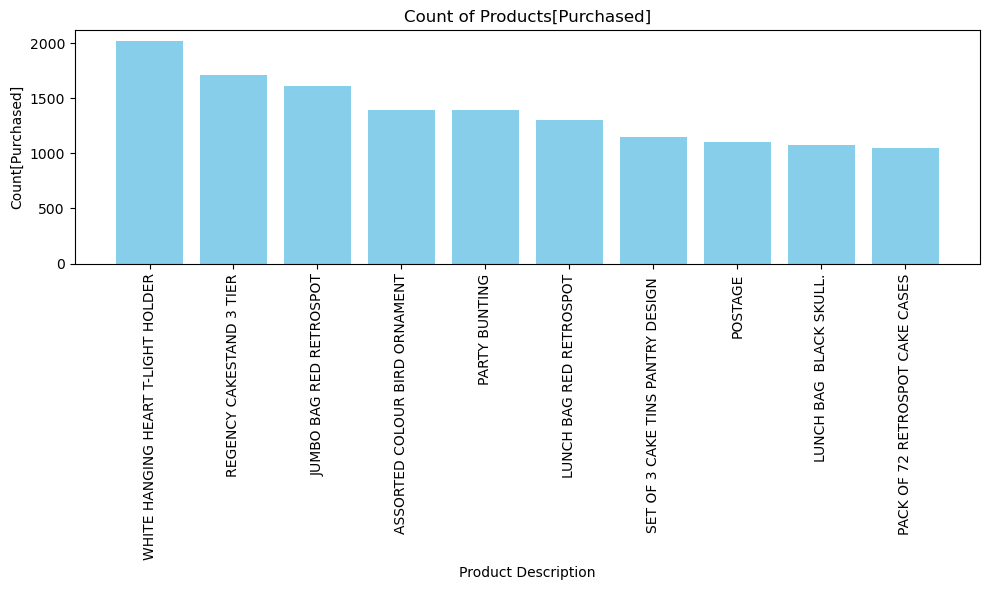

In [108]:
#satisfaction based upon the frequency of purchase
top_frequency_products = valid_quantity_df['Description'].value_counts()
top_frequency_products=top_frequency_products.to_frame().reset_index()
print("Most frequently bought products:")
top_products=top_frequency_products.head(10)
print(top_products)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_products['Description'], top_products['count'], color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Count[Purchased]')
plt.title('Count of Products[Purchased]')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Most frequently retuned products:
                Description  count
0  REGENCY CAKESTAND 3 TIER    180
1                    Manual    175
2                   POSTAGE     97
3  JAM MAKING SET WITH JARS     86
4                  Discount     77


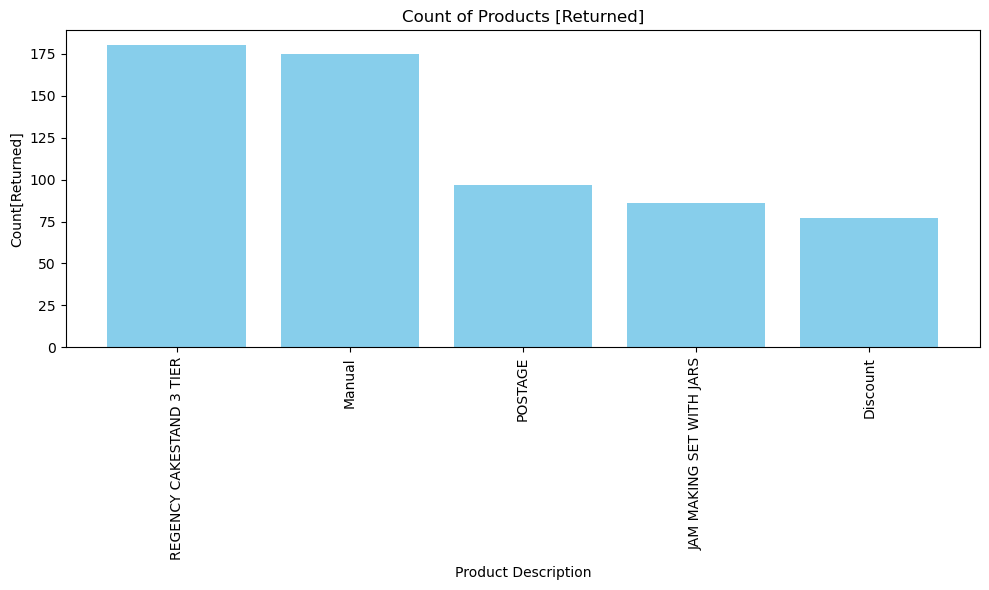

In [109]:
#dissatisfaction - where quantity contains negative values
returned_df = dfd[dfd['Quantity']<0]
mostly_Returned_items = returned_df['Description'].value_counts()
mostly_Returned_items=mostly_Returned_items.to_frame().reset_index()
print("Most frequently retuned products:")
returned_products=mostly_Returned_items.head(5)
print(returned_products)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(returned_products['Description'], returned_products['count'], color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Count[Returned]')
plt.title('Count of Products [Returned]')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 2. RFM Calculations:

In [110]:
#RECENCY
dfd_copy = dfd.copy()

dfd_copy['InvoiceDay'] = dfd_copy['InvoiceDate'].dt.date
RFM = dfd_copy.groupby('CustomerID')['InvoiceDay'].max().reset_index()
RFM['InvoiceDay'] = pd.to_datetime(RFM['InvoiceDay'])

# Extract day
most_recent_date = RFM['InvoiceDay'].max()

# days since the last purchase #RECENCY
RFM['Recency'] = (most_recent_date - RFM['InvoiceDay']).dt.days

# RFM InvoiceDay column
RFM = RFM.drop(columns=['InvoiceDay'])
RFM

,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


In [111]:
#FREQUENCY
total_transactions = dfd_copy.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
RFM = pd.merge(RFM, total_transactions, on='CustomerID')
RFM

,CustomerID,Recency,Frequency
0,12346,325,2
1,12347,2,7
2,12348,75,4
3,12349,18,1
4,12350,310,1
...,...,...,...
4367,18280,277,1
4368,18281,180,1
4369,18282,7,3
4370,18283,3,16


In [112]:
#MONETARY
total_spend = dfd_copy.groupby('CustomerID')['Total_Spend'].sum().reset_index()
total_spend.rename(columns={'Total_Spend': 'Monetary'}, inplace=True)
RFM = pd.merge(RFM, total_spend, on='CustomerID')
RFM

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,0.00
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,18,1,1757.55
4,12350,310,1,334.40
...,...,...,...,...
4367,18280,277,1,180.60
4368,18281,180,1,80.82
4369,18282,7,3,176.60
4370,18283,3,16,2045.53


In [113]:
RFM['Frequency'].max()

248

### 3. RFM Segmentation:

In [114]:
RFM['R_rank'] = RFM['Recency'].rank(ascending=False)
RFM['F_rank'] = RFM['Frequency'].rank(ascending=True)
RFM['M_rank'] = RFM['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
RFM['R_rank_norm'] = (RFM['R_rank']/RFM['R_rank'].max())*100
RFM['F_rank_norm'] = (RFM['F_rank']/RFM['F_rank'].max())*100
RFM['M_rank_norm'] = (RFM['F_rank']/RFM['M_rank'].max())*100

RFM.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346,325,2,0.00,3.881934,39.387008,39.387008
1,12347,2,7,4310.00,95.807971,81.427264,81.427264
2,12348,75,4,1797.24,37.728265,64.249771,64.249771
3,12349,18,1,1757.55,72.987252,15.027447,15.027447
4,12350,310,1,334.40,5.466866,15.027447,15.027447


In [115]:
RFM['RFM_Score'] = 0.15*RFM['R_rank_norm'] + 0.28*RFM['F_rank_norm'] + 0.57*RFM['M_rank_norm']
RFM['RFM_Score'] *= 0.05
RFM = RFM.round(2)
RFM[['CustomerID', 'RFM_Score']]

,CustomerID,RFM_Score
0,12346,1.70
1,12347,4.18
2,12348,3.01
3,12349,1.19
4,12350,0.68
...,...,...
4367,18280,0.70
4368,18281,0.79
4369,18282,2.97
4370,18283,4.73


In [116]:
RFM

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12346,325,2,0.00,3.88,39.39,39.39,1.70
1,12347,2,7,4310.00,95.81,81.43,81.43,4.18
2,12348,75,4,1797.24,37.73,64.25,64.25,3.01
3,12349,18,1,1757.55,72.99,15.03,15.03,1.19
4,12350,310,1,334.40,5.47,15.03,15.03,0.68
...,...,...,...,...,...,...,...,...
4367,18280,277,1,180.60,8.38,15.03,15.03,0.70
4368,18281,180,1,80.82,19.85,15.03,15.03,0.79
4369,18282,7,3,176.60,87.95,54.33,54.33,2.97
4370,18283,3,16,2045.53,93.42,94.84,94.84,4.73


### 4. Customer Segmentation:

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

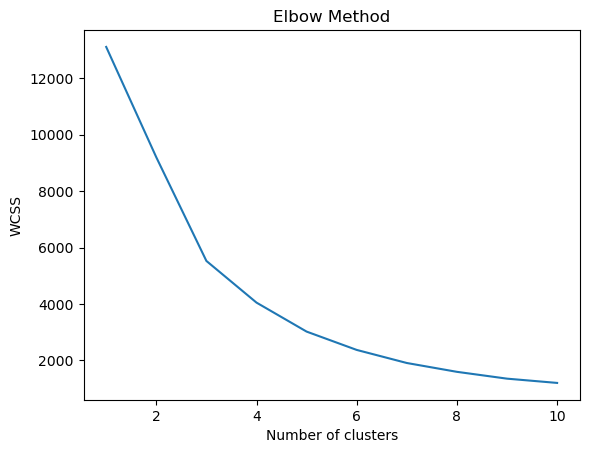

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster
0,12346,325,2,0.00,3.88,39.39,39.39,1.70,2
1,12347,2,7,4310.00,95.81,81.43,81.43,4.18,0
2,12348,75,4,1797.24,37.73,64.25,64.25,3.01,0
3,12349,18,1,1757.55,72.99,15.03,15.03,1.19,0
4,12350,310,1,334.40,5.47,15.03,15.03,0.68,2
...,...,...,...,...,...,...,...,...,...
4367,18280,277,1,180.60,8.38,15.03,15.03,0.70,2
4368,18281,180,1,80.82,19.85,15.03,15.03,0.79,2
4369,18282,7,3,176.60,87.95,54.33,54.33,2.97,0
4370,18283,3,16,2045.53,93.42,94.84,94.84,4.73,0


In [118]:
scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(RFM[['Recency', 'Frequency', 'Monetary']])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(RFM_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k = 4 

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(RFM_scaled)

RFM['Cluster'] = kmeans.labels_
RFM

In [119]:
features = ['Recency', 'Frequency', 'Monetary']
X = RFM[features]
# Defining the number of clusters

k = 4

# Applying KMeans clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


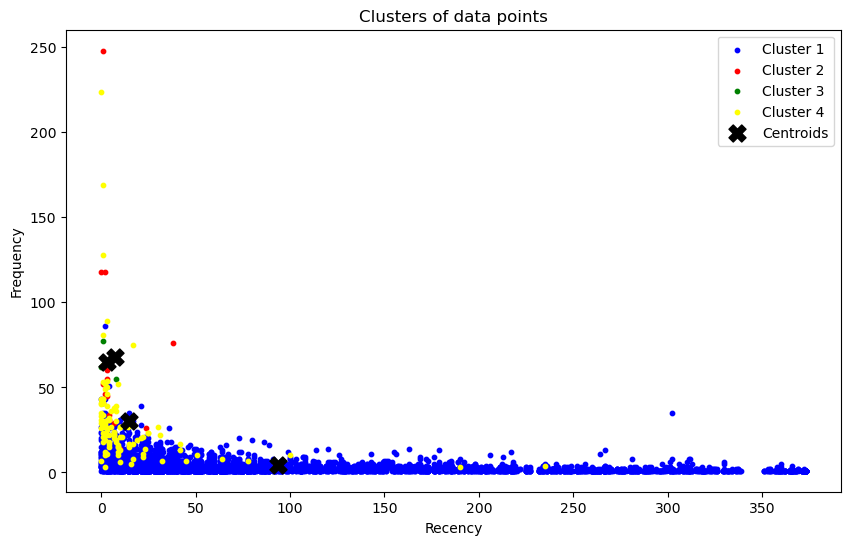

In [120]:
# Visualizing the clusters and centroids
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=10, c='blue', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=10, c='red', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=10, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', marker='X', label='Centroids')
plt.legend()
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title("Clusters of data points")
plt.show()

### 5. Segment Profiling:
#### - Analyze and profile each customer segment. 
#### - Describe the characteristics of customers in each segment, including their RFM scores and any other relevant attributes.

In [121]:
RFM["Customer_segment"] = np.where(RFM['RFM_Score'] >4.5, "Top Customers", 
                                    (np.where(RFM['RFM_Score'] > 4,"High value Customer",
                                    (np.where(RFM['RFM_Score'] > 3,"Medium Value Customer",
                                     np.where(RFM['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))))
RFM[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346,1.70,Low Value Customers
1,12347,4.18,High value Customer
2,12348,3.01,Medium Value Customer
3,12349,1.19,Lost Customers
4,12350,0.68,Lost Customers
5,12352,4.26,High value Customer
6,12353,0.76,Lost Customers
7,12354,0.74,Lost Customers
8,12355,0.76,Lost Customers
9,12356,2.83,Low Value Customers


### 6. Marketing Recommendations:
#### - Provide actionable marketing recommendations for each customer segment. 
#### - How can the business tailor its marketing strategies for each group to improve customer retention and maximize revenue?

In [122]:
print("Segment 0 Recommendations:")
print("1. Offer exclusive loyalty program to encourage purchases and increase frequency.")
print("2. Send personalized product recommendations based on searching patterns and previous purchase with special offers to tempt them back.")
print("3. Run email or SMS campaigns to keep them connected with the brand.")
print("\n")

print("Segment 1 Recommendations:")
print("1. Recognize and reward their loyalty with member points or exclusive access to new products and events.")
print("2. Suggest complementary products to increase their order value.")
print("3. Ask for their feedback on products purchased and services to further tailor your offerings.")
print("\n")

print("Segment 2 Recommendations:")
print("1. Recommend higher-value products or bundles to increase their spend.")
print("2. Create promotions for limited-time offers to pull them to make more frequent purchases.")
print("3. Share content that shows the benefits of your products to boost their value.")
print("\n")

print("Segment 3 Recommendations:")
print("1. Send targeted campaigns with attracting offers.")
print("2. Identify the reasons for their non-purchase and develop strategies to win them back.")
print("3. Ask for feedback and work on improving the aspects that pushed them away from purchasing.")
print("\n")

Segment 0 Recommendations:
1. Offer exclusive loyalty program to encourage purchases and increase frequency.
2. Send personalized product recommendations based on searching patterns and previous purchase with special offers to tempt them back.
3. Run email or SMS campaigns to keep them connected with the brand.


Segment 1 Recommendations:
1. Recognize and reward their loyalty with member points or exclusive access to new products and events.
2. Suggest complementary products to increase their order value.
3. Ask for their feedback on products purchased and services to further tailor your offerings.


Segment 2 Recommendations:
1. Recommend higher-value products or bundles to increase their spend.
2. Create promotions for limited-time offers to pull them to make more frequent purchases.
3. Share content that shows the benefits of your products to boost their value.


Segment 3 Recommendations:
1. Send targeted campaigns with attracting offers.
2. Identify the reasons for their non-purc

In [123]:
# marketing recommendations for each customer segment
marketing_recommendations = {
    'Top Customers': {
        'Retention': 'Focus on retaining these customers through loyalty programs and exclusive offers.',
        'Upsell': 'Identify complementary products and offer bundle deals to increase sales.',
    },
    'High Value Customers': {
        'Promotions': 'Offer incentives to encourage additional purchases and discounts on related products.',
        'Personalization': 'Use purchase history for personalized product recommendations.',
    },
    'Medium Value Customers': {
        'Win-Back Campaigns': 'Target inactive customers with special promotions to reactivate them.',
        'Subscription Models': 'Introduce subscription services to ensure steady revenue.',
    },
    'Low Value Customers': {
        'Customer Education': 'Provide informative content to help customers understand product value.',
        'Reactivation Campaigns': 'Create reactivation campaigns with exclusive offers.',
    }
}

# recommendations based on customer cluster
def get_recommendations(cluster):
    if cluster in marketing_recommendations:
        return marketing_recommendations[cluster]
    else:
        return {'General Recommendations': 'Collect customer feedback and conduct A/B testing for optimization.'}

# Apply recommendations 
RFM['Marketing_Recommendations'] = RFM['Cluster'].apply(get_recommendations)

RFM[['CustomerID', 'Cluster', 'Marketing_Recommendations']]

,CustomerID,Cluster,Marketing_Recommendations
0,12346,2,{'General Recommendations': 'Collect customer ...
1,12347,0,{'General Recommendations': 'Collect customer ...
2,12348,0,{'General Recommendations': 'Collect customer ...
3,12349,0,{'General Recommendations': 'Collect customer ...
4,12350,2,{'General Recommendations': 'Collect customer ...
...,...,...,...
4367,18280,2,{'General Recommendations': 'Collect customer ...
4368,18281,2,{'General Recommendations': 'Collect customer ...
4369,18282,0,{'General Recommendations': 'Collect customer ...
4370,18283,0,{'General Recommendations': 'Collect customer ...


### 7. Visualization:
#### Create visualizations (e.g., bar charts, scatter plots, or heat maps) to illustrate the RFM distribution and the clusters formed

In [124]:
total_quantity=dfd_copy.groupby('CustomerID')['Quantity'].sum().reset_index()
total_quantity.rename(columns={'InvoiceNo': 'total_quantity'}, inplace=True)
RFM = pd.merge(RFM, total_quantity, on='CustomerID')
RFM

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster,Customer_segment,Marketing_Recommendations,Quantity
0,12346,325,2,0.00,3.88,39.39,39.39,1.70,2,Low Value Customers,{'General Recommendations': 'Collect customer ...,0
1,12347,2,7,4310.00,95.81,81.43,81.43,4.18,0,High value Customer,{'General Recommendations': 'Collect customer ...,2458
2,12348,75,4,1797.24,37.73,64.25,64.25,3.01,0,Medium Value Customer,{'General Recommendations': 'Collect customer ...,2341
3,12349,18,1,1757.55,72.99,15.03,15.03,1.19,0,Lost Customers,{'General Recommendations': 'Collect customer ...,631
4,12350,310,1,334.40,5.47,15.03,15.03,0.68,2,Lost Customers,{'General Recommendations': 'Collect customer ...,197
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,277,1,180.60,8.38,15.03,15.03,0.70,2,Lost Customers,{'General Recommendations': 'Collect customer ...,45
4368,18281,180,1,80.82,19.85,15.03,15.03,0.79,2,Lost Customers,{'General Recommendations': 'Collect customer ...,54
4369,18282,7,3,176.60,87.95,54.33,54.33,2.97,0,Low Value Customers,{'General Recommendations': 'Collect customer ...,98
4370,18283,3,16,2045.53,93.42,94.84,94.84,4.73,0,Top Customers,{'General Recommendations': 'Collect customer ...,1357


In [125]:
RFM['Average_Transaction_Value']=RFM['Monetary']/RFM['Quantity']
RFM

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster,Customer_segment,Marketing_Recommendations,Quantity,Average_Transaction_Value
0,12346,325,2,0.00,3.88,39.39,39.39,1.70,2,Low Value Customers,{'General Recommendations': 'Collect customer ...,0,NaN
1,12347,2,7,4310.00,95.81,81.43,81.43,4.18,0,High value Customer,{'General Recommendations': 'Collect customer ...,2458,1.753458
2,12348,75,4,1797.24,37.73,64.25,64.25,3.01,0,Medium Value Customer,{'General Recommendations': 'Collect customer ...,2341,0.767723
3,12349,18,1,1757.55,72.99,15.03,15.03,1.19,0,Lost Customers,{'General Recommendations': 'Collect customer ...,631,2.785341
4,12350,310,1,334.40,5.47,15.03,15.03,0.68,2,Lost Customers,{'General Recommendations': 'Collect customer ...,197,1.697462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,277,1,180.60,8.38,15.03,15.03,0.70,2,Lost Customers,{'General Recommendations': 'Collect customer ...,45,4.013333
4368,18281,180,1,80.82,19.85,15.03,15.03,0.79,2,Lost Customers,{'General Recommendations': 'Collect customer ...,54,1.496667
4369,18282,7,3,176.60,87.95,54.33,54.33,2.97,0,Low Value Customers,{'General Recommendations': 'Collect customer ...,98,1.802041
4370,18283,3,16,2045.53,93.42,94.84,94.84,4.73,0,Top Customers,{'General Recommendations': 'Collect customer ...,1357,1.507391


   Cluster  Average_Recency  Average_Products_Purchased  Average_Transactions  \
0        0           130388                     2849708                 15220   
1        1               43                      541155                   534   
2        2           269015                      278593                  1962   
3        3              947                     1223395                  4474   

   Average_Spend  Average_Transaction_Value  Customer_Count  
0     4667671.24                        NaN            3169  
1     1092648.45                  13.442450               6  
2      490276.76                        NaN            1087  
3     2027922.97                 220.053046             110  


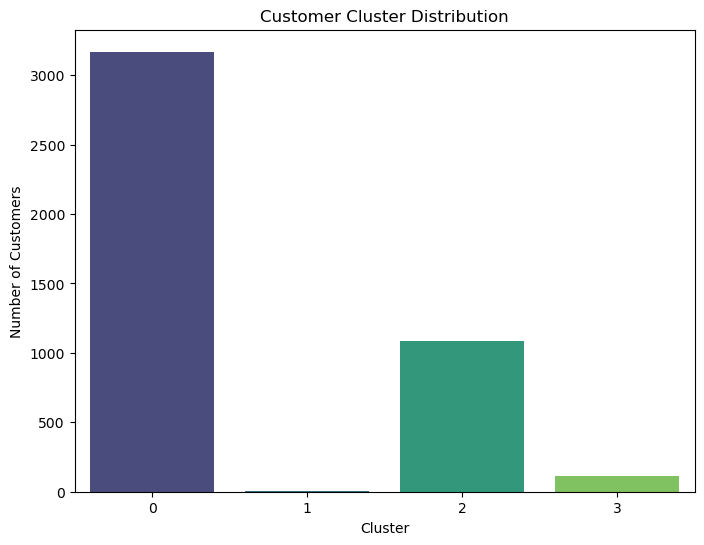

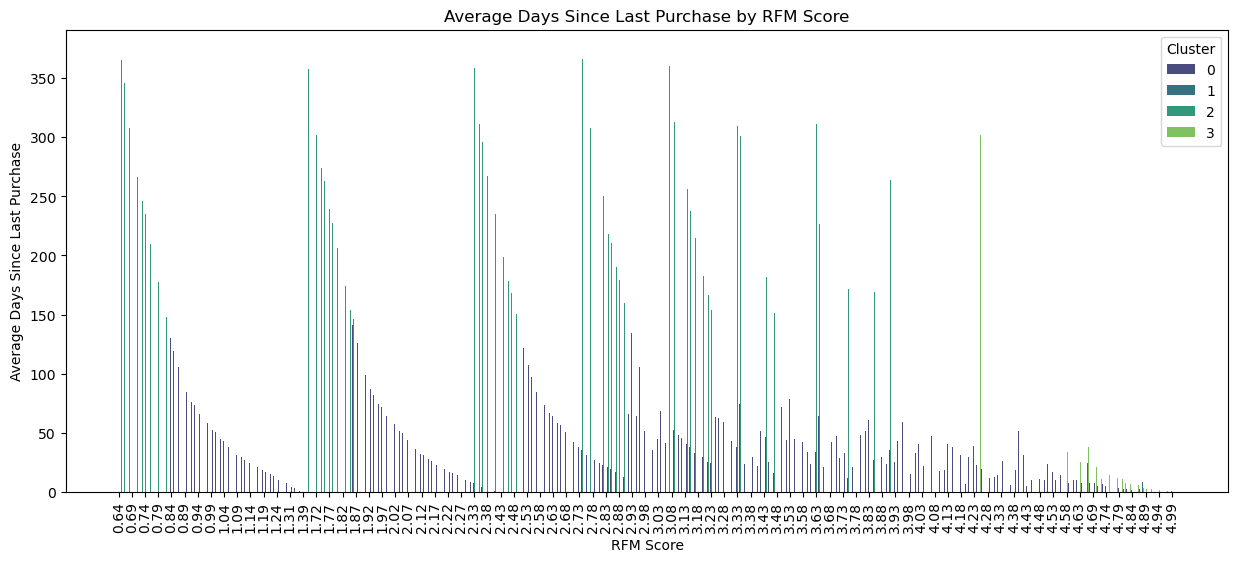

In [126]:
# Group customers by their assigned clusters
cs = RFM.groupby('Cluster').agg({
    'Recency': 'sum',
    'Quantity': 'sum',
    'Frequency': 'sum',
    'Monetary': 'sum',
    'Average_Transaction_Value': 'sum',
    'CustomerID': 'count'  # Number of customers in each cluster
}).reset_index()

# Rename columns 
cs = cs.rename(columns={
    'Recency': 'Average_Recency',
    'Quantity': 'Average_Products_Purchased',
    'Frequency': 'Average_Transactions',
    'Monetary': 'Average_Spend',
    'Average_Transaction_Value': 'Average_Transaction_Value',
    'CustomerID': 'Customer_Count'
})

print(cs)

# Visualize using bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Customer_Count', data=cs, palette='viridis')
plt.title('Customer Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

sd = RFM.groupby(['Cluster', 'RFM_Score']).agg({
    'Recency': 'mean',
    'Quantity': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Average_Transaction_Value': 'mean',
}).reset_index()

# Visualize the data
plt.figure(figsize=(15, 6))
sns.barplot(x='RFM_Score', y='Recency', hue='Cluster', data=sd, palette='viridis')
plt.title('Average Days Since Last Purchase by RFM Score')
plt.xlabel('RFM Score')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=100)
plt.ylabel('Average Days Since Last Purchase')
plt.show()

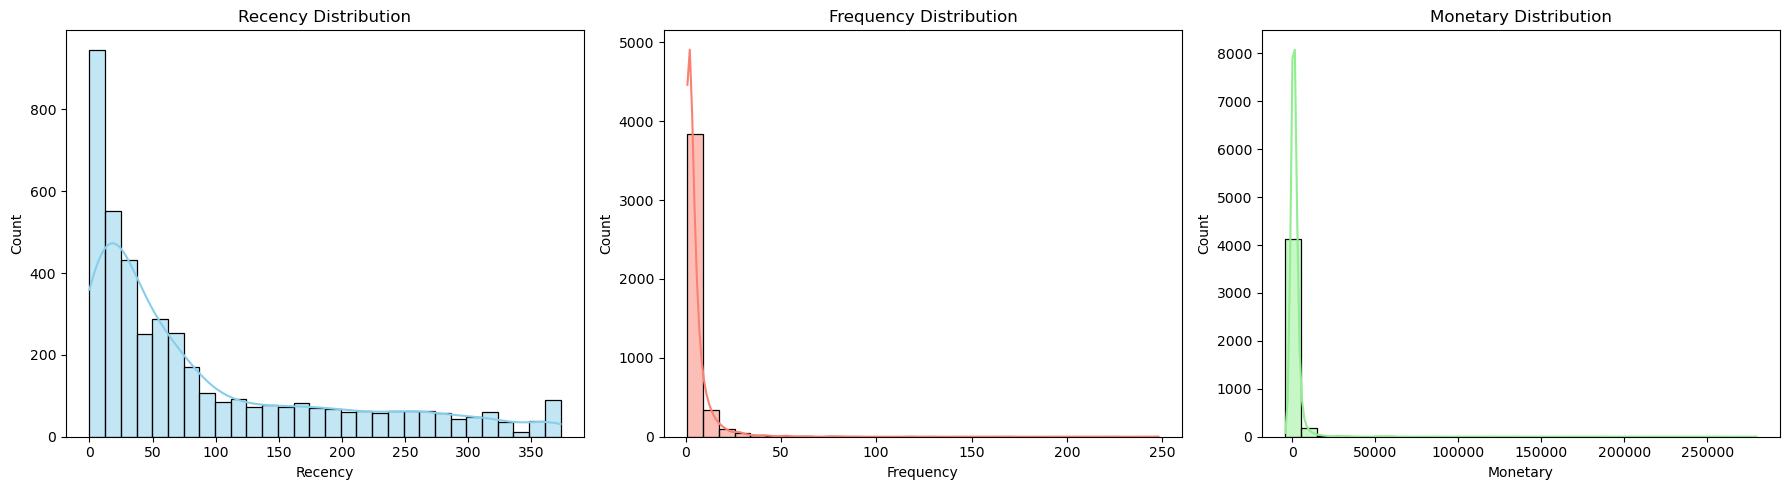

,Cluster,Recency,Average_Products_Purchased,Average_Transactions,Average_Spend,Average_Transaction_Value,Customer_Count
0,0,41.144841,899.245188,4.802777,1472.916138,NaN,3169
1,1,7.166667,90192.500000,89.000000,182108.075000,2.240408,6
2,2,247.483901,256.295308,1.804968,451.036578,NaN,1087
3,3,8.609091,11121.772727,40.672727,18435.663364,2.000482,110


In [127]:
plt.figure(figsize=(18, 5))

# Recency distribution
plt.subplot(131)
sns.histplot(RFM['Recency'], bins=30, kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Recency')

# Frequency distribution
plt.subplot(132)
sns.histplot(RFM['Frequency'], bins=30, kde=True, color='salmon')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

# Monetary distribution
plt.subplot(133)
sns.histplot(RFM['Monetary'], bins=30, kde=True, color='lightgreen')
plt.title('Monetary Distribution')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

# Group customers by their assigned clusters
cs = RFM.groupby('Cluster').agg({
    'Recency': 'mean',
    'Quantity': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Average_Transaction_Value': 'mean',
    'CustomerID': 'count'  
}).reset_index()

# Rename columns for clarity
cs = cs.rename(columns={
    'Days_Since_Last_Purchase': 'Average_Recency',
    'Quantity': 'Average_Products_Purchased',
    'Frequency': 'Average_Transactions',
    'Monetary': 'Average_Spend',
    'Average_Transaction_Value': 'Average_Transaction_Value',
    'CustomerID': 'Customer_Count'
})

cs